# Readout performance plots
* Notebook to plot the various readout performance curves

## First load in data

In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.cm as cm

froot_er = "-EnergyRes.txt"
fdir_er = "../readouts/energyres/"
froot_eff = "-Efficiency.txt"
fdir_eff = "../readouts/efficiency/"
froot_ar = "-AngRes.txt"
fdir_ar = "../readouts/angres/"
froot_ht = "-HeadTail.txt"
fdir_ht = "../readouts/headtail/"
fname = ["" for x in range(0,8)]
fname[0] ="Ideal"
fname[1] ="Pixel"
fname[2] ="Strip"
fname[3] ="Optical"
fname[4] ="Wire"
fname[5] ="Pad"
fname[6] ="Planar"
fname[7] ="Nondirectional"

F_ar = zeros(shape=(1000,8))
He_ar = zeros(shape=(1000,8))
F_ht = zeros(shape=(1000,8))
He_ht = zeros(shape=(1000,8))
F_eff = zeros(shape=(1000,8))
He_eff = zeros(shape=(1000,8))
F_er = zeros(shape=(1000,8))
He_er = zeros(shape=(1000,8))
for i in range(0,8):
    data = loadtxt(fdir_er+fname[i]+froot_er)
    Evals,F_er[:,i],He_er[:,i] = data[:,0], data[:,1], data[:,2]
    
    data = loadtxt(fdir_eff+fname[i]+froot_eff)
    Evals,F_eff[:,i],He_eff[:,i] = data[:,0], data[:,1], data[:,2]
    
    data = loadtxt(fdir_ar+fname[i]+froot_ar)
    Evals,F_ar[:,i],He_ar[:,i] = data[:,0], data[:,1], data[:,2]
    
    data = loadtxt(fdir_ht+fname[i]+froot_ht)
    Evals,F_ht[:,i],He_ht[:,i] = data[:,0], data[:,1], data[:,2]


## Energy resolution curves

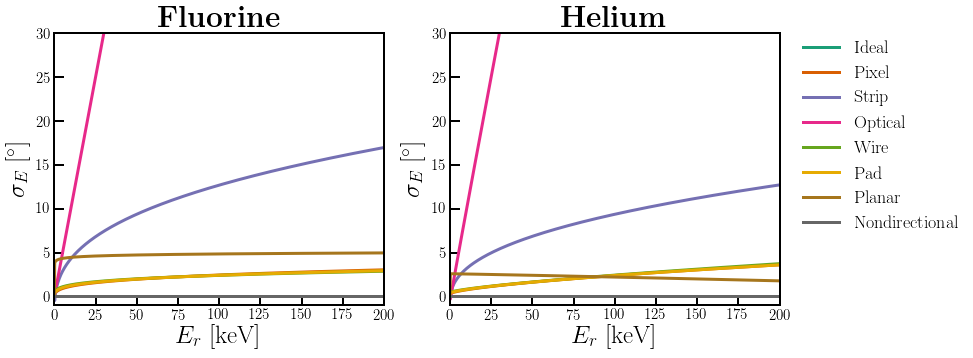

In [2]:
# Plot
plt.rcParams['axes.linewidth'] = 2
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
col = cm.Dark2(linspace(0,1,8))
xmin = -0.1
xmax = 200.0

# Energy Resolution
ymax = 30.0
ymin = -1
fig = plt.figure(figsize=(13,5))

for pli in [1,2]:
    ax = fig.add_subplot(1,2,pli)
    for i in range(0,8):
        if pli==1:
            plt.plot(Evals,Evals*F_er[:,i],'-',color=col[i,:],linewidth=3,label=fname[i])
            plt.title(r"{\bf Fluorine}",fontsize=30)
        else:
            plt.plot(Evals,Evals*He_er[:,i],'-',color=col[i,:],linewidth=3,label=fname[i])
            plt.title(r"{\bf Helium}",fontsize=30)

        plt.xlabel(r"$E_r$ [keV]",fontsize=25)
        plt.ylabel(r"$\sigma_E$ [$^\circ$]",fontsize=25)
        
    ax.set_xlim(left=xmin, right=xmax)
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.tick_params(which='major',direction='in',width=2,length=10)
    ax.tick_params(which='minor',direction='in',width=1,length=7)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.legend(fontsize=18,frameon=False,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig('../plots/energyres.pdf',bbox_inches='tight')


## Efficiency curves

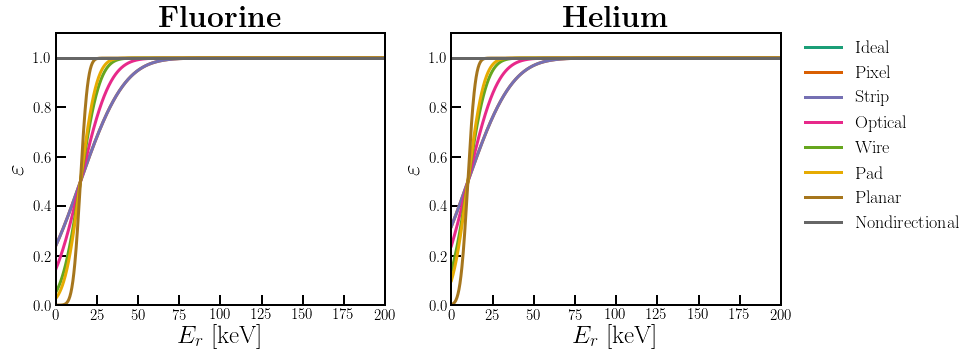

In [3]:
# Efficiency
ymax = 1.1
ymin = 0.0
fig = plt.figure(figsize=(13,5))

for pli in [1,2]:
    ax = fig.add_subplot(1,2,pli)
    for i in range(0,8):
        if pli==1:
            plt.plot(Evals,F_eff[:,i],'-',color=col[i,:],linewidth=3,label=fname[i])
            plt.title(r"{\bf Fluorine}",fontsize=30)
        else:
            plt.plot(Evals,He_eff[:,i],'-',color=col[i,:],linewidth=3,label=fname[i])
            plt.title(r"{\bf Helium}",fontsize=30)

        plt.xlabel(r"$E_r$ [keV]",fontsize=25)
        plt.ylabel(r"$\varepsilon$",fontsize=25)
        
    ax.set_xlim(left=xmin, right=xmax)
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.tick_params(which='major',direction='in',width=2,length=10)
    ax.tick_params(which='minor',direction='in',width=1,length=7)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.legend(fontsize=18,frameon=False,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig('../plots/efficiency.pdf',bbox_inches='tight')

## Angular resolution curves

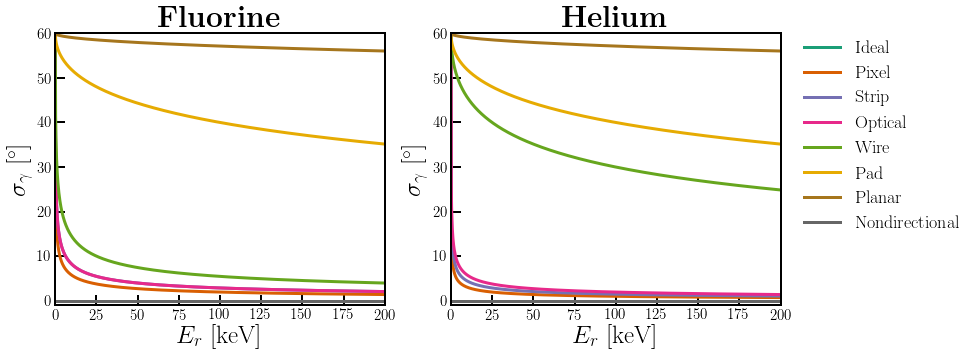

In [4]:
# Angular resolution
ymax = 60.0
ymin = -1.0
fig = plt.figure(figsize=(13,5))

for pli in [1,2]:
    ax = fig.add_subplot(1,2,pli)
    for i in range(0,8):
        if pli==1:
            plt.plot(Evals,F_ar[:,i],'-',color=col[i,:],linewidth=3,label=fname[i])
            plt.title(r"{\bf Fluorine}",fontsize=30)
        else:
            plt.plot(Evals,He_ar[:,i],'-',color=col[i,:],linewidth=3,label=fname[i])
            plt.title(r"{\bf Helium}",fontsize=30)

        plt.xlabel(r"$E_r$ [keV]",fontsize=25)
        plt.ylabel(r"$\sigma_\gamma$ [$^\circ$]",fontsize=25)
        
    ax.set_xlim(left=xmin, right=xmax)
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.tick_params(which='major',direction='in',width=2,length=10)
    ax.tick_params(which='minor',direction='in',width=1,length=7)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.legend(fontsize=18,frameon=False,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig('../plots/angres.pdf',bbox_inches='tight')

## Head tail efficiency

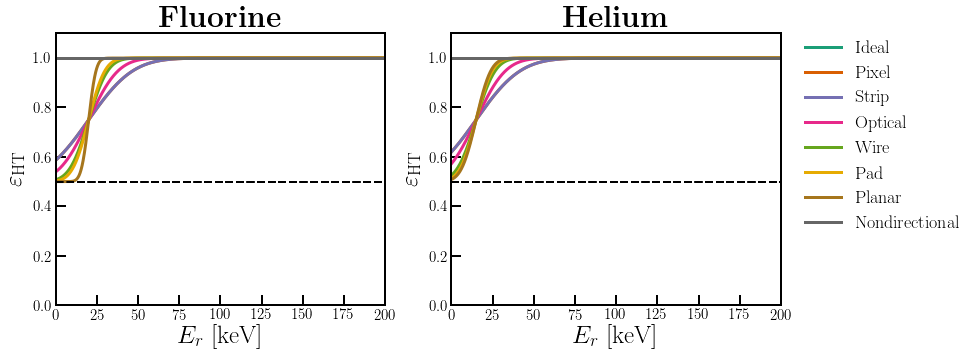

In [5]:
# Head tail 
ymax = 1.1
ymin = 0.0
fig = plt.figure(figsize=(13,5))

for pli in [1,2]:
    ax = fig.add_subplot(1,2,pli)
    for i in range(0,8):
        if pli==1:
            plt.plot(Evals,F_ht[:,i],'-',color=col[i,:],linewidth=3,label=fname[i])
            plt.title(r"{\bf Fluorine}",fontsize=30)
        else:
            plt.plot(Evals,He_ht[:,i],'-',color=col[i,:],linewidth=3,label=fname[i])
            plt.title(r"{\bf Helium}",fontsize=30)
        plt.plot([xmin,xmax],[0.5,0.5],'k--',linewidth=2)
        plt.xlabel(r"$E_r$ [keV]",fontsize=25)
        plt.ylabel(r"$\varepsilon_{\rm HT}$",fontsize=25)
        
    ax.set_xlim(left=xmin, right=xmax)
    ax.set_ylim(bottom=ymin, top=ymax)
    ax.tick_params(which='major',direction='in',width=2,length=10)
    ax.tick_params(which='minor',direction='in',width=1,length=7)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.legend(fontsize=18,frameon=False,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig.savefig('../plots/headtail.pdf',bbox_inches='tight')